In [1]:
import pandas as pd

In [2]:
data = pd.read_excel("Crop_recommendation.xlsx")

In [3]:
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,0,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,0.000000,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
data.isnull().sum()

N               0
P               0
K               6
temperature     0
humidity        0
ph             14
rainfall        0
label           0
dtype: int64

In [5]:
data.dtypes

N               object
P               object
K               object
temperature     object
humidity        object
ph              object
rainfall       float64
label           object
dtype: object

In [6]:
data["K"].nunique()

74

In [7]:
data["K"].mode()

0    17
Name: K, dtype: object

In [8]:
data["K"].fillna(17,inplace=True)

In [9]:
data["ph"].nunique()

2186

In [10]:
data.to_csv("new_crop.csv")

In [11]:
df = pd.read_csv("new_crop.csv",na_values=[" ?","?","? "])

In [12]:
df.isnull().sum()

Unnamed: 0       0
N               39
P               96
K              135
temperature      1
humidity         1
ph              15
rainfall         0
label            0
dtype: int64

In [13]:
df["K"].nunique()

72

In [14]:
df["P"].nunique()

115

In [15]:
for i in df.columns:
    if df[i].dtypes=='O':
        df[i].fillna(df[i].mode()[0],inplace=True)
    elif df[i].dtypes!='O' and df[i].nunique()<((len(df)/100)*10):
        df[i].fillna(df[i].mode()[0],inplace=True)
    else:
        df[i].fillna(df[i].median(),inplace=True)

In [16]:
df.isnull().sum()

Unnamed: 0     0
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [17]:
df.dtypes

Unnamed: 0       int64
N              float64
P              float64
K              float64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le=LabelEncoder()

In [20]:
df["labele_endoed"] = le.fit_transform(df["label"])

In [21]:
df

,Unnamed: 0,N,P,K,temperature,humidity,ph,rainfall,label,labele_endoed
0,0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice,20
1,1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice,20
2,2,60.0,55.0,0.0,23.004459,82.320763,7.840207,263.964248,rice,20
3,3,74.0,35.0,40.0,26.491096,80.158363,6.980401,0.000000,rice,20
4,4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice,20
...,...,...,...,...,...,...,...,...,...,...
2195,2195,107.0,34.0,32.0,26.774637,66.413269,6.780064,177.774507,coffee,5
2196,2196,99.0,15.0,27.0,27.417112,56.636362,6.086922,127.924610,coffee,5
2197,2197,118.0,33.0,30.0,24.131797,67.225123,6.362608,173.322839,coffee,5
2198,2198,117.0,32.0,34.0,26.272418,52.127394,6.758793,127.175293,coffee,5


In [22]:
df[["N","P","K","temperature","humidity","ph","rainfall","label"]].corr()

C:\Users\MD Shahbaz\AppData\Local\Temp\ipykernel_12988\2418307386.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[["N","P","K","temperature","humidity","ph","rainfall","label"]].corr()


,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.227916,-0.146963,0.025893,0.176411,0.097541,0.042314
P,-0.227916,1.000000,0.727965,-0.123622,-0.111427,-0.134590,-0.070582
K,-0.146963,0.727965,1.000000,-0.164533,0.174816,-0.165024,-0.059494
temperature,0.025893,-0.123622,-0.164533,1.000000,0.199903,-0.020180,-0.026888
humidity,0.176411,-0.111427,0.174816,0.199903,1.000000,-0.003670,0.088600
ph,0.097541,-0.134590,-0.165024,-0.020180,-0.003670,1.000000,-0.109440
rainfall,0.042314,-0.070582,-0.059494,-0.026888,0.088600,-0.109440,1.000000


In [23]:
import seaborn as sns

C:\Users\MD Shahbaz\AppData\Local\Temp\ipykernel_12988\2415876610.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df[["N","P","K","temperature","humidity","ph","rainfall","label"]].corr())


<AxesSubplot: >

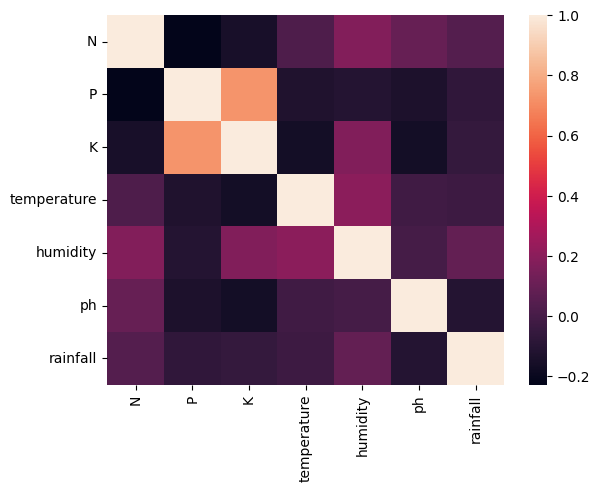

In [24]:
sns.heatmap(df[["N","P","K","temperature","humidity","ph","rainfall","label"]].corr())

In [25]:
x=df[["N","P","K","temperature","humidity","ph","rainfall"]]

In [26]:
x

,N,P,K,temperature,humidity,ph,rainfall
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537
2,60.0,55.0,0.0,23.004459,82.320763,7.840207,263.964248
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,0.000000
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107.0,34.0,32.0,26.774637,66.413269,6.780064,177.774507
2196,99.0,15.0,27.0,27.417112,56.636362,6.086922,127.924610
2197,118.0,33.0,30.0,24.131797,67.225123,6.362608,173.322839
2198,117.0,32.0,34.0,26.272418,52.127394,6.758793,127.175293


In [27]:
y=df[["label"]]

In [28]:
y

,label
0,rice
1,rice
2,rice
3,rice
4,rice
...,...
2195,coffee
2196,coffee
2197,coffee
2198,coffee


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2529)

In [31]:
x_train

,N,P,K,temperature,humidity,ph,rainfall
1733,39.0,60.0,52.0,26.265595,90.796681,6.651491,59.493734
1208,6.0,123.0,203.0,12.756796,81.624974,6.130310,66.778446
1430,100.0,17.0,48.0,29.727911,94.297533,6.367801,26.523641
1316,102.0,14.0,52.0,26.794899,89.648152,6.510760,57.740918
1223,25.0,121.0,201.0,30.507348,82.717756,5.594241,70.082004
...,...,...,...,...,...,...,...
494,17.0,64.0,17.0,36.750875,58.257991,6.079385,124.602815
380,32.0,79.0,15.0,23.909101,20.746193,5.706199,81.602112
943,38.0,21.0,35.0,20.336911,89.380038,5.841367,110.965314
740,24.0,80.0,19.0,29.678925,69.085455,6.808042,65.664366


In [32]:
y_train

,label
1733,papaya
1208,grapes
1430,muskmelon
1316,watermelon
1223,grapes
...,...
494,pigeonpeas
380,kidneybeans
943,pomegranate
740,blackgram


In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
lr=LogisticRegression()

In [35]:
lr.fit(x_train,y_train)

c:\Users\MD Shahbaz\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\MD Shahbaz\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
x_train

,N,P,K,temperature,humidity,ph,rainfall
1733,39.0,60.0,52.0,26.265595,90.796681,6.651491,59.493734
1208,6.0,123.0,203.0,12.756796,81.624974,6.130310,66.778446
1430,100.0,17.0,48.0,29.727911,94.297533,6.367801,26.523641
1316,102.0,14.0,52.0,26.794899,89.648152,6.510760,57.740918
1223,25.0,121.0,201.0,30.507348,82.717756,5.594241,70.082004
...,...,...,...,...,...,...,...
494,17.0,64.0,17.0,36.750875,58.257991,6.079385,124.602815
380,32.0,79.0,15.0,23.909101,20.746193,5.706199,81.602112
943,38.0,21.0,35.0,20.336911,89.380038,5.841367,110.965314
740,24.0,80.0,19.0,29.678925,69.085455,6.808042,65.664366


In [37]:
lr.predict([[1888,64,60,28,90,7,64]])

c:\Users\MD Shahbaz\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['cotton'], dtype=object)

In [38]:
lr.score(x_test,y_test)

0.9022727272727272

In [39]:
lr.score(x_train,y_train)

0.9130681818181818

In [40]:
df["label"]

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

In [41]:
## for saving the file we us of pickel

import pickle

In [42]:
with open("model.pkl","wb") as model_file:
    pickle.dump(lr,model_file)